In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn
import numpy as np
from datetime import datetime
import logging

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [19]:
!ls -l data

total 39684
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7834805 jul 31 23:23 EdgesCusco_wazeinfo.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  6769459 ago  8 21:43 GrafoCusco_edges.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7834805 ago  8 21:45 GrafoCusco_edgeswaze.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   730523 ago  8 21:43 GrafoCusco_nodes.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup 11372052 ago  9 22:29 GrafoCuscoWaze.graphml
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  1694626 may 24 21:53 RutasCusco.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  4389423 jul 24 07:54 RutasCusco_snap_CuscoNodes.csv


In [20]:
G = ox.load_graphml ('data/GrafoCuscoWaze.graphml')
nx.info(G)

'Name: \nType: MultiDiGraph\nNumber of nodes: 10195\nNumber of edges: 27082\nAverage in degree:   2.6564\nAverage out degree:   2.6564'

In [22]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 10195
Number of edges: 27082
Average in degree:   2.6564
Average out degree:   2.6564


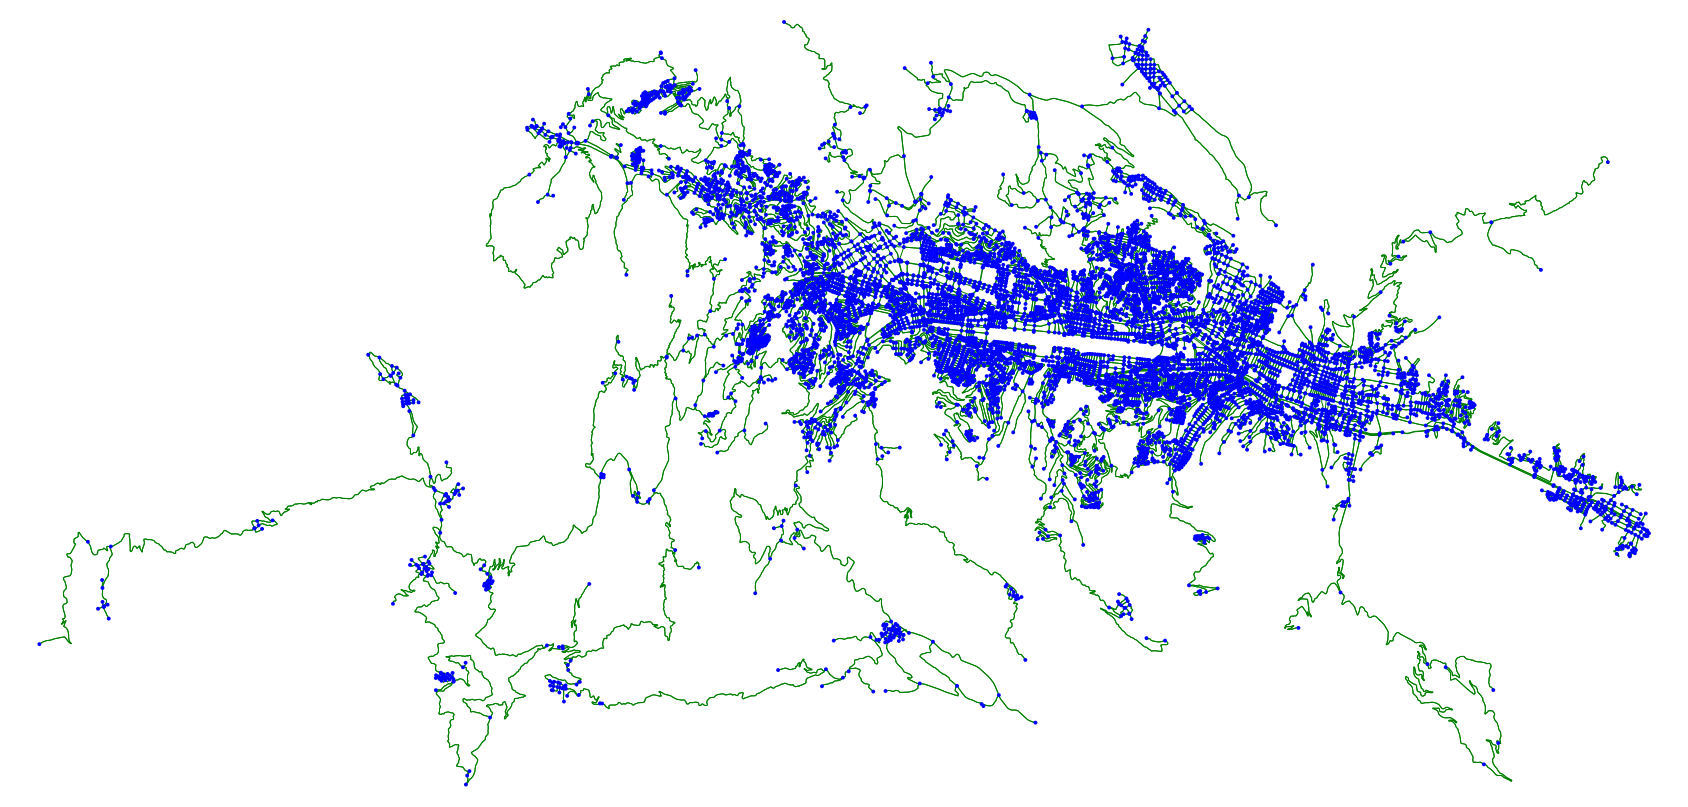

In [21]:
fig, ax = ox.plot_graph(G, bgcolor='white', node_color='blue', edge_color='green', figsize=(30,30))

In [23]:
nodes, edges = ox.graph_to_gdfs(G)

In [24]:
edges.head()

osmid  \
u        v          key                                    
30962246 3707257935 0    [885654808, 4818990, 885654806]   
         30962247   0                          893177331   
30962247 3707288540 0                            4819824   
         30962248   0                          893177331   
         3709406594 0                            4819824   

                                           name      highway  oneway   length  \
u        v          key                                                         
30962246 3707257935 0    Avenida Velasco Astete        trunk   False  267.284   
         30962247   0    Avenida Velasco Astete        trunk    True   25.109   
30962247 3707288540 0    José Abelardo Quiñones  residential   False    7.919   
         30962248   0    Avenida Velasco Astete        trunk    True   71.513   
         3709406594 0    José Abelardo Quiñones  residential   False  165.049   

                                                                  geometry  \
u        v          key                                                      
30962246 3707257935 0    LINESTRING (-71.94544 -13.53886, -71.94500 -13...   
         30962247   0    LINESTRING (-71.94544 -13.53886, -71.94561 -13...   
30962247 3707288540 0    LINESTRING (-71.94565 -13.53876, -71.94566 -13...   
         30962248   0    LINESTRING (-71.94565 -13.53876, -71.94629 -13...   
         3709406594 0    LINESTRING (-71.94565 -13.53876, -71.94564 -13...   

                        lanes maxspeed junction  ref access width bridge  
u        v          key                                                   
30962246 3707257935 0     NaN      NaN      NaN  NaN    NaN   NaN    NaN  
         30962247   0     NaN      NaN      NaN  NaN    NaN   NaN    NaN  
30962247 3707288540 0     NaN      NaN      NaN  NaN    NaN   NaN    NaN  
         30962248   0     NaN      NaN      NaN  NaN    NaN   NaN    NaN  
         3709406594 0     NaN      NaN      NaN  NaN    NaN   NaN    NaN

In [27]:
nodes = pd.read_csv("data/GrafoCusco_nodes.csv", index_col=[0])
nodes['geometry'] = nodes['geometry'].apply(wkt.loads)
nodes = gpd.GeoDataFrame(nodes, crs='epsg:4326')
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
30962246,-13.538861,-71.945440,3,NaN,POINT (-71.94544 -13.53886)
30962247,-13.538763,-71.945649,4,NaN,POINT (-71.94565 -13.53876)
30962248,-13.538602,-71.946289,3,NaN,POINT (-71.94629 -13.53860)
30962249,-13.538453,-71.946895,3,NaN,POINT (-71.94689 -13.53845)
30962250,-13.538113,-71.948183,3,NaN,POINT (-71.94818 -13.53811)
...,...,...,...,...,...
11006413506,-13.518061,-71.965234,1,NaN,POINT (-71.96523 -13.51806)
11045533749,-13.572804,-71.824987,3,NaN,POINT (-71.82499 -13.57280)
11045533755,-13.569562,-71.826366,4,NaN,POINT (-71.82637 -13.56956)


In [47]:
edges = pd.read_csv("data/GrafoCusco_edgeswaze.csv", index_col=[0,1,2])
edges['geometry'] = edges['geometry'].apply(wkt.loads)
edges = gpd.GeoDataFrame(edges, crs='epsg:4326')
edges.head()

osmid  \
u        v          key                                    
30962246 3707257935 0    [885654808, 4818990, 885654806]   
         30962247   0                          893177331   
30962247 3707288540 0                            4819824   
         30962248   0                          893177331   
         3709406594 0                            4819824   

                                           name      highway  oneway   length  \
u        v          key                                                         
30962246 3707257935 0    Avenida Velasco Astete        trunk   False  267.284   
         30962247   0    Avenida Velasco Astete        trunk    True   25.109   
30962247 3707288540 0    José Abelardo Quiñones  residential   False    7.919   
         30962248   0    Avenida Velasco Astete        trunk    True   71.513   
         3709406594 0    José Abelardo Quiñones  residential   False  165.049   

                                                                  geometry  \
u        v          key                                                      
30962246 3707257935 0    LINESTRING (-71.94544 -13.53886, -71.94500 -13...   
         30962247   0    LINESTRING (-71.94544 -13.53886, -71.94561 -13...   
30962247 3707288540 0    LINESTRING (-71.94565 -13.53876, -71.94566 -13...   
         30962248   0    LINESTRING (-71.94565 -13.53876, -71.94629 -13...   
         3709406594 0    LINESTRING (-71.94565 -13.53876, -71.94564 -13...   

                        lanes maxspeed junction  ref access  width bridge  \
u        v          key                                                     
30962246 3707257935 0     NaN      NaN      NaN  NaN    NaN    NaN    NaN   
         30962247   0     NaN      NaN      NaN  NaN    NaN    NaN    NaN   
30962247 3707288540 0     NaN      NaN      NaN  NaN    NaN    NaN    NaN   
         30962248   0     NaN      NaN      NaN  NaN    NaN    NaN    NaN   
         3709406594 0     NaN      NaN      NaN  NaN    NaN    NaN    NaN   

                         wazeinfo_minutes  wazeinfo_km  \
u        v          key                                  
30962246 3707257935 0            0.550000        0.248   
         30962247   0            0.033333        0.018   
30962247 3707288540 0            0.000000        0.001   
         30962248   0            0.000000        0.000   
         3709406594 0            1.983333        0.163   

                                             wazeinfo  
u        v          key                                
30962246 3707257935 0                   (0.55, 0.248)  
         30962247   0    (0.03333333333333333, 0.018)  
30962247 3707288540 0                    (0.0, 0.001)  
         30962248   0                      (0.0, 0.0)  
         3709406594 0     (1.9833333333333334, 0.163)

In [48]:
# edges = edges.reset_index().drop_duplicates(subset=['u','v'])
# edges.head()

In [49]:
# edges.set_index(['u','v'], inplace=True)
# edges.head()

In [59]:
cond = edges['wazeinfo_km'] == -1
edges.loc[cond,'wazeinfo_minutes'] = np.nan
edges.loc[cond,'wazeinfo_km'] = np.nan
edges.loc[cond,'wazeinfo'] = np.nan

In [61]:
cond = edges['wazeinfo_km'].isna()
edges.loc[cond,:]

osmid                         name  \
u           v           key                                            
30962672    30963247    0    1077452581                          NaN   
30963206    30964831    0    1010498896                  Vía Expresa   
30963245    30963247    0     379231972                  Vía Expresa   
30963247    30962672    0    1077452581                          NaN   
            30964727    0       4819207  Calle República de Colombia   
...                                 ...                          ...   
10839152761 633941149   0     448421984                          NaN   
            4454285860  0    1077452667                          NaN   
11047357300 3248632943  0     661285016                          NaN   
            6199445439  0     661285016                          NaN   
            10783567128 0    1189754694                          NaN   

                                  highway  oneway    length  \
u           v           key                                   
30962672    30963247    0     residential   False    26.963   
30963206    30964831    0         primary   False    66.487   
30963245    30963247    0         primary   False   211.615   
30963247    30962672    0     residential   False    26.963   
            30964727    0     residential   False   186.479   
...                                   ...     ...       ...   
10839152761 633941149   0    unclassified   False    14.061   
            4454285860  0     residential   False   216.869   
11047357300 3248632943  0     residential   False  2159.761   
            6199445439  0     residential   False   111.331   
            10783567128 0    unclassified   False  1955.118   

                                                                      geometry  \
u           v           key                                                      
30962672    30963247    0    LINESTRING (-71.94961 -13.53364, -71.94958 -13...   
30963206    30964831    0    LINESTRING (-71.95408 -13.53295, -71.95347 -13...   
30963245    30963247    0    LINESTRING (-71.95152 -13.53317, -71.94999 -13...   
30963247    30962672    0    LINESTRING (-71.94958 -13.53340, -71.94961 -13...   
            30964727    0    LINESTRING (-71.94958 -13.53340, -71.94954 -13...   
...                                                                        ...   
10839152761 633941149   0    LINESTRING (-71.97028 -13.50764, -71.97041 -13...   
            4454285860  0    LINESTRING (-71.97028 -13.50764, -71.97015 -13...   
11047357300 3248632943  0    LINESTRING (-72.01788 -13.52174, -72.01775 -13...   
            6199445439  0    LINESTRING (-72.01788 -13.52174, -72.01795 -13...   
            10783567128 0    LINESTRING (-72.01788 -13.52174, -72.01772 -13...   

                            lanes maxspeed junction    ref access  width  \
u           v           key                                                
30962672    30963247    0     NaN      NaN      NaN    NaN    NaN    NaN   
30963206    30964831    0       2       60      NaN  PE-3S     no    NaN   
30963245    30963247    0       2       60      NaN  PE-3S    NaN    NaN   
30963247    30962672    0     NaN      NaN      NaN    NaN    NaN    NaN   
            30964727    0     NaN      NaN      NaN    NaN    NaN    NaN   
...                           ...      ...      ...    ...    ...    ...   
10839152761 633941149   0     NaN      NaN      NaN    NaN    NaN    NaN   
            4454285860  0     NaN      NaN      NaN    NaN    NaN    NaN   
11047357300 3248632943  0     NaN      NaN      NaN    NaN    NaN    NaN   
            6199445439  0     NaN      NaN      NaN    NaN    NaN    NaN   
            10783567128 0     NaN      NaN      NaN    NaN    NaN    NaN   

                            bridge  wazeinfo_minutes  wazeinfo_km wazeinfo  
u           v           key                                                 
30962672    30963247    0      NaN               NaN          NaN  

In [62]:
%%time
G = ox.graph_from_gdfs(nodes, edges, )

CPU times: user 5.83 s, sys: 86.8 ms, total: 5.92 s
Wall time: 5.92 s


In [65]:
route_wkm = ox.shortest_path(G, 30962246, 11047357300, weight='wazeinfo_km')
route_wmin = ox.shortest_path(G, 30962246, 11047357300, weight='wazeinfo_minutes')
route = ox.shortest_path(G, 30962246, 11047357300)


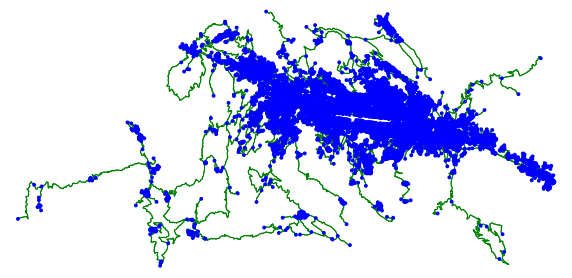

In [73]:
fig, ax = ox.plot_graph(G, bgcolor='white', node_color='blue', edge_color='green', figsize=(10,10))

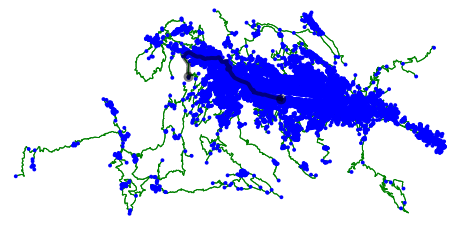

In [75]:
fig, ax = ox.plot_graph_route(G, route, route_color='black', 
                              bgcolor='white', node_color='blue', edge_color='green'
                             )


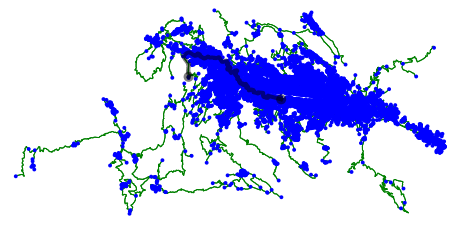

In [76]:
fig, ax = ox.plot_graph_route(G, route_wkm, route_color='black', 
                              bgcolor='white', node_color='blue', edge_color='green'
                             )